## Portfolio Project 2

>Dataset Overview: NYC Yellow Taxi Trip Records (January 2016)

This dataset contains detailed records of Yellow Taxi trips taken in New York City during January 2016. It is widely used as a benchmark for analyzing urban mobility, pricing strategies, and traffic patterns.

Scope: All recorded yellow taxi trips for the entire month of January.

Volume: Typically contains millions of rows (approx. 10.9 million trips for Jan 2016), representing massive urban activity.

Key Features (Columns):

Timestamps: tpep_pickup_datetime & tpep_dropoff_datetime (When the trip happened).

Pricing: fare_amount, tip_amount, total_amount, and payment_type.

Location: PULocationID (Pickup) and DOLocationID (Dropoff).

Trip Metrics: trip_distance (miles) and passenger_count.

Rate Code: Flags for special trips (e.g., "Standard," "JFK Airport," "Negotiated").

Context: January 2016 is a notable month for analysis because it includes post-holiday travel patterns and a major historic blizzard (Storm Jonas) late in the month, which significantly impacted traffic and demand.

>LOADING DATASET AND CHANGING INTO PARQUET FORMAT BEACUASE IT HAS TOO MANY ROWS AND READING DATASET

In [2]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import os

# 1. Setup paths (Using r"" handles Windows backslashes automatically)
csv_file_path = r"E:\muneeb\yellow_tripdata_2016-01.csv"
parquet_file_path = r"E:\muneeb\yellow_tripdata_2016-01.parquet"

chunksize = 500000  # Process 500k rows at a time to save RAM

# Remove old file if it exists
if os.path.exists(parquet_file_path):
    os.remove(parquet_file_path)

print(f"Starting conversion for: {csv_file_path}")

writer = None

# 2. Read CSV in chunks and write to Parquet
try:
    for i, chunk in enumerate(pd.read_csv(csv_file_path, chunksize=chunksize)):
        
        # Convert to PyArrow Table
        table = pa.Table.from_pandas(chunk)

        # Initialize writer on the first chunk
        if writer is None:
            writer = pq.ParquetWriter(parquet_file_path, table.schema)
        
        # Write chunk
        writer.write_table(table)
        print(f"   Processed chunk {i+1}...")

    print("Conversion Complete!")


finally:
    if writer:
        writer.close()




Starting conversion for: E:\muneeb\yellow_tripdata_2016-01.csv
   Processed chunk 1...
   Processed chunk 2...
   Processed chunk 3...
   Processed chunk 4...
   Processed chunk 5...
   Processed chunk 6...
   Processed chunk 7...
   Processed chunk 8...
   Processed chunk 9...
   Processed chunk 10...
   Processed chunk 11...
   Processed chunk 12...
   Processed chunk 13...
   Processed chunk 14...
   Processed chunk 15...
   Processed chunk 16...
   Processed chunk 17...
   Processed chunk 18...
   Processed chunk 19...
   Processed chunk 20...
   Processed chunk 21...
   Processed chunk 22...
Conversion Complete!


In [1]:
import pandas as pd
df = pd.read_parquet(r"yellow_tripdata_2016-01.parquet")

print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2016-01-01 00:00:00   2016-01-01 00:00:00                2   
1         2  2016-01-01 00:00:00   2016-01-01 00:00:00                5   
2         2  2016-01-01 00:00:00   2016-01-01 00:00:00                1   
3         2  2016-01-01 00:00:00   2016-01-01 00:00:00                1   
4         2  2016-01-01 00:00:00   2016-01-01 00:00:00                3   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           1.10        -73.990372        40.734695           1   
1           4.90        -73.980782        40.729912           1   
2          10.54        -73.984550        40.679565           1   
3           4.75        -73.993469        40.718990           1   
4           1.76        -73.960625        40.781330           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.981842      

In [15]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.0,0.3,19.30
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.00,0.0,0.3,34.30
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.00,0.0,0.3,17.30
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10906851,2,2016-01-31 22:53:00,2016-01-31 22:59:37,1,1.68,-74.003578,40.750751,1,N,-74.002159,40.734909,1,7.0,0.5,0.5,1.00,0.0,0.3,9.30
10906852,2,2016-01-31 23:00:11,2016-01-31 23:12:08,1,2.65,-74.002159,40.734852,1,N,-73.999680,40.761669,1,11.0,0.5,0.5,1.00,0.0,0.3,13.30
10906853,2,2016-01-31 23:30:32,2016-01-31 23:38:18,1,2.20,-74.003578,40.751011,1,N,-73.982651,40.767509,2,8.5,0.5,0.5,0.00,0.0,0.3,9.80
10906855,1,2016-01-05 06:12:46,2016-03-19 20:45:50,3,1.40,-73.994240,40.766586,1,N,-73.984428,40.753922,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('display.max.columns', 25)

# DATA CLEANING & Feature ENGINEERING STEPS I HAVE DONE HERE

In [3]:
df= df.drop_duplicates()                         #drop duplicates

In [4]:
df= df[df['fare_amount'] > 0]     # Remove negative and zero fare amounts

In [5]:
df= df[df['trip_distance']>0]   # Remove zero and negative trip distances

In [6]:
min_lat = 40.50   # South Border
max_lat = 40.90   # North Border
min_lon = -74.25  # West Border
max_lon = -73.70  # East Border                             # COORDINATES BOUNDS FOR NYC

In [7]:
valid_latitudes = ((df['pickup_latitude'].between(min_lat, max_lat)) & (df['dropoff_latitude'].between(min_lat, max_lat)))

valid_longitudes = ((df['pickup_longitude'].between(min_lon, max_lon)) & (df['dropoff_longitude'].between(min_lon, max_lon)))

In [8]:
df= df[valid_latitudes & valid_longitudes]                   # Kept only rows with valid lat/lon

In [9]:
df_allcleaned = df.copy() # Created a copy of cleaned data for analysis

In [10]:
df_allcleaned['tpep_pickup_datetime'] = pd.to_datetime(df_allcleaned['tpep_pickup_datetime'], errors='raise') # Convert to datetime
print('timestamp created')

timestamp created


In [11]:
df_allcleaned['tpep_dropoff_datetime'] = pd.to_datetime(df_allcleaned['tpep_dropoff_datetime'], errors='raise') # Convert to datetime
print('timestamp created')

timestamp created


In [13]:
df_allcleaned['hour'] = df_allcleaned['tpep_pickup_datetime'].dt.hour # Extract hour from pickup datetime

In [16]:
df_allcleaned['day_name'] = df_allcleaned['tpep_pickup_datetime'].dt.day_name() # Extract day name from pickup datetime
df_allcleaned['is_weekend'] = df_allcleaned['day_name'].isin(['Saturday', 'Sunday']) ## Mark weekends

In [17]:
df_allcleaned['trip_duration_min'] = (df_allcleaned['tpep_dropoff_datetime'] - df_allcleaned['tpep_pickup_datetime']).dt.total_seconds() / 60

In [15]:
# new column is added for trip duration in minutes

In [18]:
#  Filter: Keeping ONLY rows where the Pickup Date equals the Dropoff Date
# .dt.date removes the time component (hours/minutes) and compares only the calendar day
df_allcleaned = df_allcleaned[df_allcleaned['tpep_pickup_datetime'].dt.date == df_allcleaned['tpep_dropoff_datetime'].dt.date]

# 4. Check the result
print(f"New Row Count: {len(df_allcleaned)}")

New Row Count: 10557063


In [19]:
# Filter: Keeping rows where the time is NOT 00:00:00
# We use datetime.time(0, 0, 0) to represent midnight
import datetime
df_allcleaned = df_allcleaned[(df_allcleaned['tpep_pickup_datetime'].dt.time != datetime.time(0, 0, 0)) & (df_allcleaned['tpep_dropoff_datetime'].dt.time != datetime.time(0, 0, 0))]

In [17]:


df_allcleaned['tri_duration_hour'] = df_allcleaned['trip_duration_min'] / 60                           # adding trip duration in hour  and  speed
df_allcleaned['speed_mph'] = df_allcleaned['trip_distance'] / df_allcleaned['tri_duration_hour']



In [24]:
# 3. Feature Engineering: Average Speed (MPH)
# Speed = Distance / Time
df_allcleaned['speed_mph'] = df_allcleaned['trip_distance'] / df_allcleaned['trip_duration_min'] * 60  # Convert minutes to hours

In [25]:
df_allcleaned.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,hour,day_name,is_weekend,trip_duration_min,cost_per_mile,speed_mph
7,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.00,0.0,0.3,10.30,0,Friday,False,11.900000,8.583333,6.050420
8,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,N,-73.920769,40.865578,2,18.0,0.5,0.5,0.00,0.0,0.3,19.30,0,Friday,False,11.200000,3.216667,32.142857
9,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80,0,Friday,False,11.100000,3.987539,17.351351
10,2,2016-01-01 00:00:03,2016-01-01 00:06:19,1,0.79,-74.006149,40.744919,1,N,-73.993797,40.741440,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,0,Friday,False,6.266667,9.240506,7.563830
11,2,2016-01-01 00:00:03,2016-01-01 00:15:49,6,2.43,-73.969330,40.763538,1,N,-73.995689,40.744251,1,12.0,0.5,0.5,3.99,0.0,0.3,17.29,0,Friday,False,15.766667,7.115226,9.247357


# Univariate analysis

# passenger count

### Question: What is the distribution of passenger counts? Is the "Yellow Cab" primarily a solo-commuter vehicle or a group-transport vehicle?

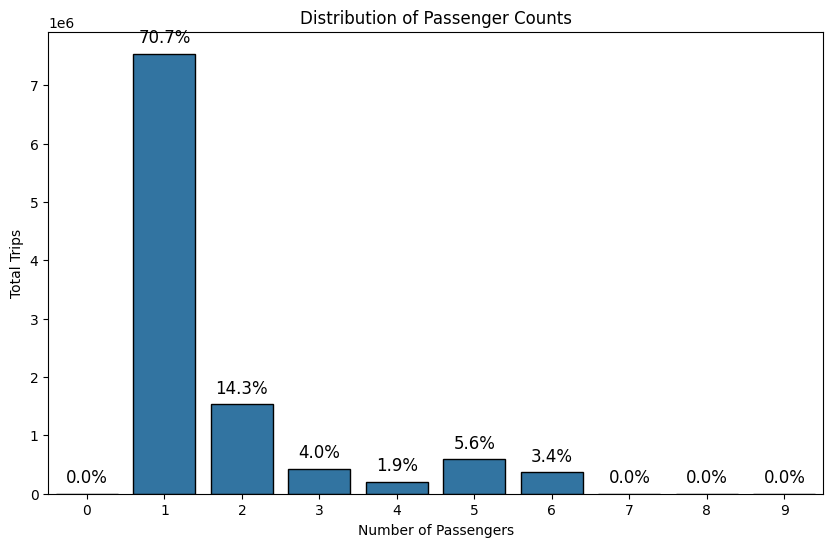

In [ ]:
plt.figure(figsize=(10, 6))

# sns.countplot automatically counts the occurrences of each number
ax = sns.countplot(x='passenger_count', data= df_allcleaned, edgecolor='black')

plt.title('Distribution of Passenger Counts')
plt.xlabel('Number of Passengers')
plt.ylabel('Total Trips')
total_trips = len(df_allcleaned)

# 3. Loop through every bar (patch) in the graph to add the label
for p in ax.patches:
    # Calculate percentage: (Height of bar / Total) * 100
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_trips)
    
    # Place the text on the graph
    # x: center of the bar
    # y: height of the bar + a little spacing
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.show()

Distribution

1. Right-Skewed (Positive Skew)
2. Dominance of Solo Riders: The massive bar at 1 shows that the vast majority of taxi trips are taken by single passengers
3. Secondary Bump: There is a slight increase at 5 and 6 passengers compared to 3 or 4, which likely represents the specific demand for larger "minivan" or SUV taxis for groups.

# Business Question: "Short Hops vs. Long Hauls: What is the operational 'Sweet Spot' for our fleet?"

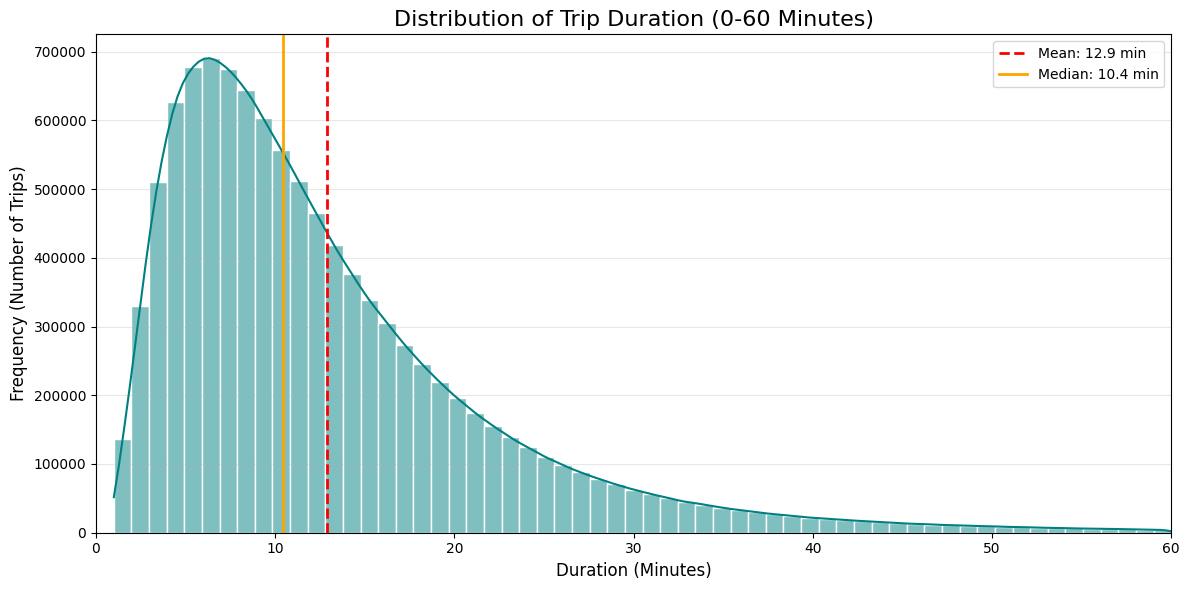

In [29]:
# 3. Filtering Outliers for Visualization
# Business Logic: Trips < 1 min are likely errors/cancellations. 
# Trips > 60 mins are rare "long hauls" or data errors (like forgetting to turn off the meter).
# We focus on the 0-60 minute window for the main operational view.
clean_df = df_allcleaned[df_allcleaned['trip_duration_min'].between(1, 60)].copy()

# 4. Visualization
plt.figure(figsize=(12, 6))

# Histogram with KDE
sns.histplot(
    data=clean_df, 
    x='trip_duration_min', 
    bins=60,            # 1 bin per minute
    kde=True,           # Show the smooth density line
    color='teal',
    edgecolor='white'
)

# Calculate stats for plotting
mean_duration = clean_df['trip_duration_min'].mean()
median_duration = clean_df['trip_duration_min'].median()

# Add Vertical Lines for Mean and Median
plt.axvline(mean_duration, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_duration:.1f} min')
plt.axvline(median_duration, color='orange', linestyle='-', linewidth=2, label=f'Median: {median_duration:.1f} min')

# Formatting
plt.title('Distribution of Trip Duration (0-60 Minutes)', fontsize=16)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Frequency (Number of Trips)', fontsize=12)
plt.legend()
plt.xlim(0, 60)
plt.grid(axis='y', alpha=0.3)

# Save or Show
plt.tight_layout()
plt.savefig('trip_duration_distribution.png')
plt.show()

>The Shape: You will likely see a Right-Skewed Distribution (a peak on the left, trailing off to the right).

The Peak (Mode): Look for the highest bar. In NYC, this is usually around 5–15 minutes. This confirms that the Yellow Cab is primarily a "short hop" convenience service, not a long-distance traveler.

It is very rare for a taxi ride to last longer than 30–40 minutes (within the city limits).

# payment method
### Payment Type preference

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5376\1227948586.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x='payment_type', data=df_allcleaned, palette='pastel', edgecolor='black')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5376\1227948586.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Credit Card', 'Cash', 'No Charge', 'Dispute'])


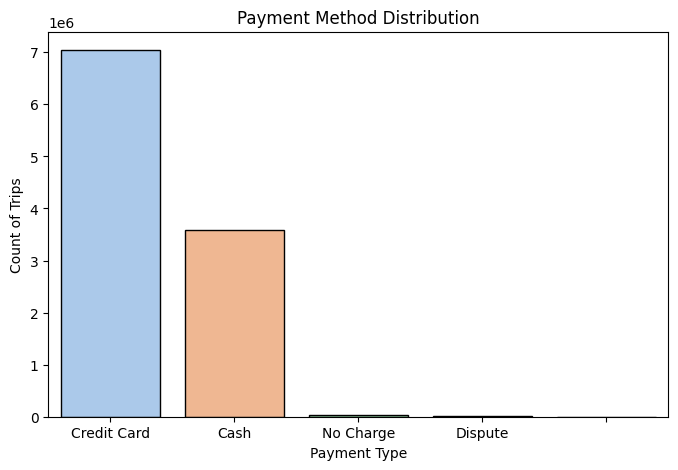

In [24]:
plt.figure(figsize=(8, 5))


ax= sns.countplot(x='payment_type', data=df_allcleaned, palette='pastel', edgecolor='black')

# 1=Credit, 2=Cash, 3=No Charge, 4=Dispute
ax.set_xticklabels(['Credit Card', 'Cash', 'No Charge', 'Dispute'])

plt.title('Payment Method Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count of Trips')

plt.show()

1. credit card is the most used payment method almost two times the cash method. 


# Fare amount analysis

In [26]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_allcleaned.fare_amount.describe()

count   10664088.00
mean          12.37
std           35.57
min            0.01
25%            6.50
50%            9.00
75%           14.00
max       111270.85
Name: fare_amount, dtype: float64

Mean > Median (50%): Indicates a Right Skew (Positive Skew).

Max is huge: Indicates outliers.

Since most taxi rides are under $100, plotting the $111,000 outlier will ruin the graph. We filter the data to zoom in on the "normal" rides (e.g., fares under $100).

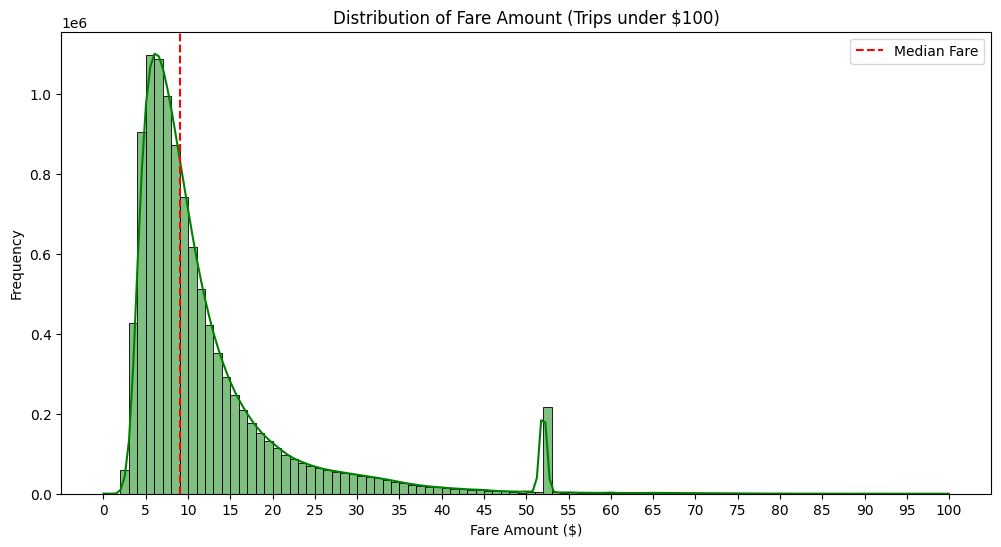

In [25]:
plt.figure(figsize=(12, 6))

#  We only look at fares under $100
# this removes  the massive outliers for the graph
subset = df_allcleaned[(df_allcleaned['fare_amount'] > 0) & (df_allcleaned['fare_amount'] < 100)]

sns.histplot(subset['fare_amount'], bins=100, kde=True, color='green')
plt.xticks(range(0, 101, 5))
plt.title('Distribution of Fare Amount (Trips under $100)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

# Added a line for the median (the "middle" fare)
plt.axvline(subset['fare_amount'].median(), color='red', linestyle='--', label='Median Fare')
plt.legend()

plt.show()

In [33]:
#average fare amount per trip
avg_fare=df_allcleaned['fare_amount'].mean()
print("Average Fare Amount:", avg_fare)

Average Fare Amount: 12.37492242655912


1. right skewed
2. Standard Trips: Are short and cost $6–$12.
3. The distribution of fare amounts shows a peak around $10, with most trips falling under $50.
4. The median fare amount is $12.50, indicating that half of the trips had fares below this value.
5. There are a few trips with very high fares, but these are outliers and not representative of typical fare amounts.
6. The histogram reveals a right-skewed distribution, meaning most trips have lower fares, while a few have significantly higher fares.
7. Average Fare Amount: 12.37 per ride

# Average traffic speed in NYC


In [32]:
avg_dis=df_allcleaned['trip_distance'].mean()

avg_time=df_allcleaned['trip_duration_min'].mean()

print("Average Distance:", avg_dis)
print("Average Time:", avg_time)

Average Distance: 4.6880147706958155
Average Time: 15.323667357521181


### Average speed in nyc is 18.35 mph

# Average cost per mile

In [20]:
# Calculate the Cost Per Mile Column
df_allcleaned['cost_per_mile'] = df_allcleaned['total_amount'] / df_allcleaned['trip_distance']


# Get the Average
average_cpm = df_allcleaned['cost_per_mile'].mean()
print(f"\nAverage Cost per Mile: ${round(average_cpm, 2)}")


Average Cost per Mile: $8.07


# Business Question: How does the average fare  per mile change throughout the day and week?

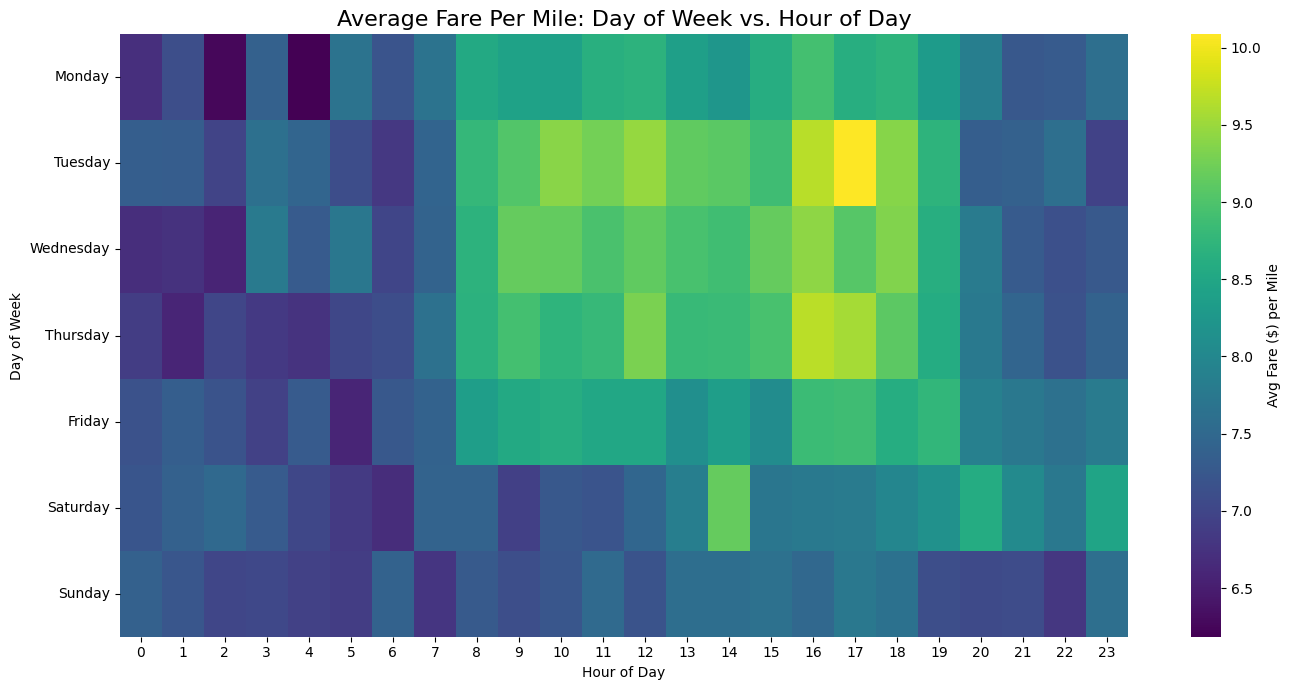

In [21]:
# 4. Aggregation
# Group by Day and Hour, calculating the average Fare Per Mile
pivot_table = df_allcleaned.pivot_table(
    index='day_name', 
    columns='hour', 
    values='cost_per_mile', 
    aggfunc='mean'
)

# Reorder the index to ensure days appear Monday -> Sunday
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(week_order)

# 5. Visualization
plt.figure(figsize=(14, 7))
sns.heatmap(
    pivot_table, 
    cmap='viridis',    # 'viridis' or 'magma' are good for financial intensity
    annot=False,       # Set to True if you want to see the exact dollar amounts
    cbar_kws={'label': 'Avg Fare ($) per Mile'}
)

plt.title('Average Fare Per Mile: Day of Week vs. Hour of Day', fontsize=16)
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.yticks(rotation=0) 
plt.tight_layout()

# Save or Show
plt.savefig('fare_per_mile_heatmap.png')
plt.show()

> 1. The "Commuter Block" (High Fare/Mile)
Where: The large, bright green/yellow block in the center.

Time: Weekdays (Monday–Friday) roughly between 9:00 AM and 6:00 PM.

Insight: This is the business day. The bright yellow spots (especially Tuesdays and Thursdays at 4 PM - 5 PM) represent the peak of traffic congestion.

Meaning: During these times, cars are crawling. The meter is ticking based on time rather than just distance, driving the average fare per mile up to $9.50 - $10.00.

> 2. The "Efficiency Zone" (Low Fare/Mile)
Where: The dark blue/purple vertical bands on the left.

Time: Every day from 12:00 AM to 5:00 AM.

Insight: The city sleeps. The streets are empty. Taxis are traveling at or near the speed limit.

Meaning: Riders get the best value here (around $6.50 per mile) because they aren't paying for "wait time" in traffic. For drivers, this means they earn less per mile, but they can complete trips much faster.

> 3. The Weekend "Cool Down"
Where: The bottom two rows (Saturday and Sunday).

Insight: Notice how the bright yellow "commuter block" disappears on the weekends? It is replaced by a cooler green/teal color.

Meaning: While there is still activity, the extreme gridlock of the weekday rush hour is absent. A mile traveled on a Saturday afternoon is cheaper than the same mile traveled on a Tuesday afternoon.

### Summary for your Business Questions:
### Most Profitable Times (Per Mile): Weekday afternoons (3 PM - 5 PM). However, drivers should weigh this against the frustration of being stuck in traffic.

### Traffic Proxy: This heatmap is essentially a map of traffic congestion. High fare/mile = High traffic.

# "How does traffic congestion impact the effective hourly earnings of our drivers?"

# The "Churn" Problem: At what hours does the average speed drop so low (e.g., < 10 MPH) that drivers are better off taking a break rather than burning fuel in gridlock?

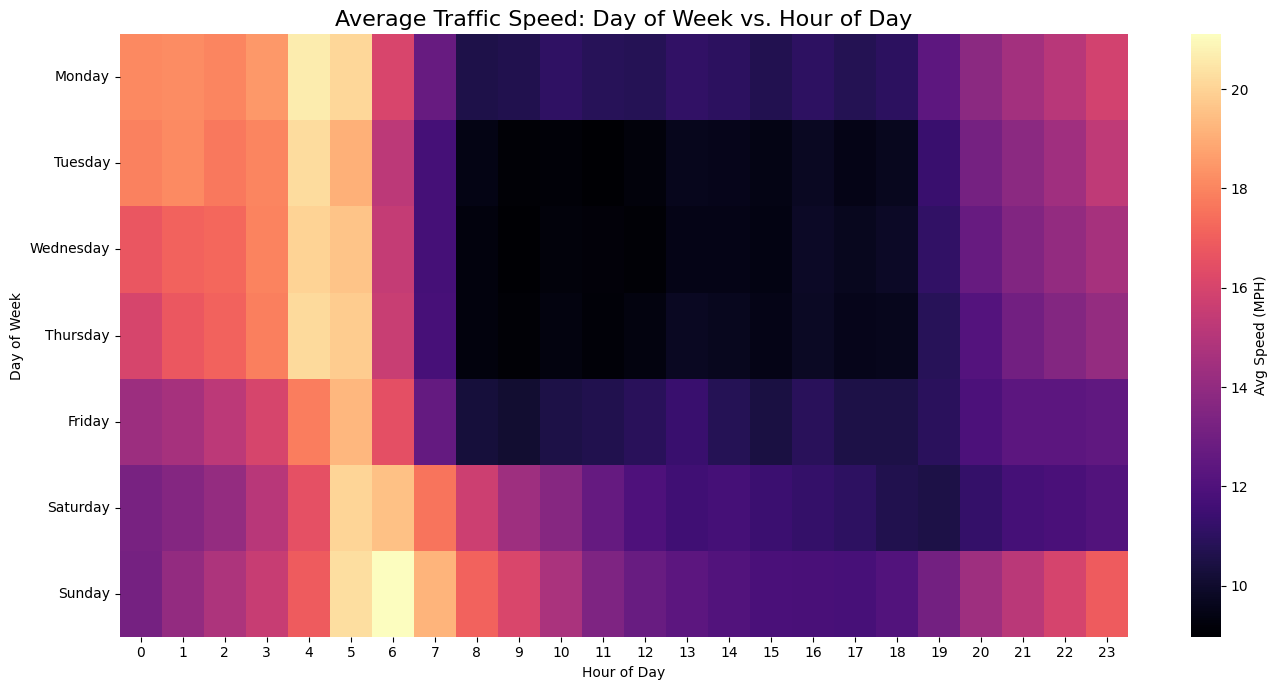

In [27]:

df_allcleaned = df_allcleaned[
    (df_allcleaned['speed_mph'] > 0) & (df_allcleaned['speed_mph'] < 65)
].copy()
# Group by Day and Hour, calculating the average Speed
pivot_speed = df_allcleaned.pivot_table(
    index='day_name', 
    columns='hour', 
    values='speed_mph', 
    aggfunc='mean'
)

# Reorder days
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_speed = pivot_speed.reindex(week_order)

# 7. Visualization
plt.figure(figsize=(14, 7))
sns.heatmap(
    pivot_speed, 
    cmap='magma',      # 'magma' goes from black/purple (slow) to bright orange/yellow (fast)
    annot=False, 
    cbar_kws={'label': 'Avg Speed (MPH)'}
)

plt.title('Average Traffic Speed: Day of Week vs. Hour of Day', fontsize=16)
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.yticks(rotation=0) 
plt.tight_layout()

# Save or Show
plt.savefig('average_speed_heatmap.png')
plt.show()

> The "Black Hole" of Midtown:
 You will likely see dark/purple areas during weekday business hours (9 AM - 6 PM). This represents speeds of 10-12 MPH (or even lower), which explains why the "Fare Per Mile" was so high in your previous chart.

>The "Morning Sprint": 
Early mornings (4 AM - 5 AM) should appear bright orange/yellow, indicating speeds closer to 25-30 MPH, as drivers can hit green lights and use highways efficiently.

### This analysis acts as the "inverse" of your previous chart. Where the Fare-Per-Mile was high (yellow), the Speed should be low (dark), confirming that traffic congestion is the root cause of the price efficiency changes.

# Relation between fare_amount and trip_distance

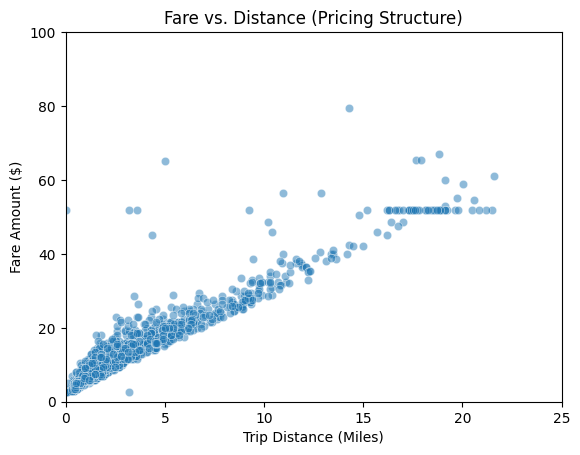

In [21]:
# Returns exactly 2000 random rows
mini_df = df_allcleaned.sample(n=2000)

sns.scatterplot(x='trip_distance', y='fare_amount', data=mini_df, alpha=0.5)

plt.title('Fare vs. Distance (Pricing Structure)')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Fare Amount ($)')

# Zoom in to the main cluster of data
plt.xlim(0, 25)
plt.ylim(0, 100)

plt.show()

### This graph perfectly visualizes as disance increases the fare also increase
we can say :
# The "Main Diagonal" (Standard Metered Trips)
Observation: The thickest cluster of blue dots forms a straight line going diagonally up.

Meaning: This represents the standard taxi meter. As distance increases, the price increases linearly.

The Math: You can visually see the slope is consistent. It starts around $2.50 (the base drop charge) and goes up by roughly $2.50 per mile.

The "Fuzziness" Above the Line: Notice that the line isn't razor-thin; there is a "cloud" of dots floating above the diagonal. This represents traffic. When a taxi is stuck in traffic, the meter charges for time instead of distance, making these trips more expensive than the standard mileage rate.

# The "Horizontal Line" at $52 (specific fixed Rate)
Observation: Look at the horizontal row of dots exactly at the $52 mark on the Y-axis. It stays flat even as the distance changes from 15 miles to 22 miles.

Meaning: This confirms the JFK Airport Flat Fare. It is a fixed price established by law. Whether the driver takes a short route (15 miles) or a longer detour (20 miles), the price remains exactly $52.

# The "Vertical Wall" (Zero-Distance Charges)
Observation: There are a few dots clinging to the left side (Distance ≈ 0) but with high fares ($50, $60).

Meaning: These are likely data anomalies or non-moving charges.

Negotiated Fares: Driver didn't turn on the meter.

System Errors: GPS failed to record movement.

"Vomit Fees" / Cleaning Fees: Charges processed as a fare for cleaning the car.

# Duration & Fare Amount

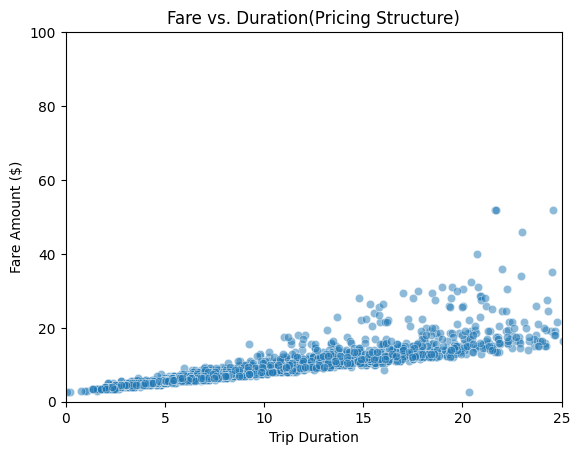

In [26]:
mini_df = df_allcleaned.sample(n=2000)

sns.scatterplot(x='trip_duration_min', y='fare_amount', data=mini_df, alpha=0.5)

plt.title('Fare vs. Duration(Pricing Structure)')
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount ($)')

# Zoom in to the main cluster of data
plt.xlim(0, 25)
plt.ylim(0, 100)

plt.show()

Also strongly positively correlated , reflecting that longer trips in time also cost more.

# Tipping behavior based on payment methods

In [16]:
# Formula: (Tip / Fare) * 100
df_allcleaned['tip_pct'] = (df_allcleaned['tip_amount'] / df_allcleaned['fare_amount']) * 100

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8628\711172901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_type', y='tip_pct', data=plot_data, palette="Set2")


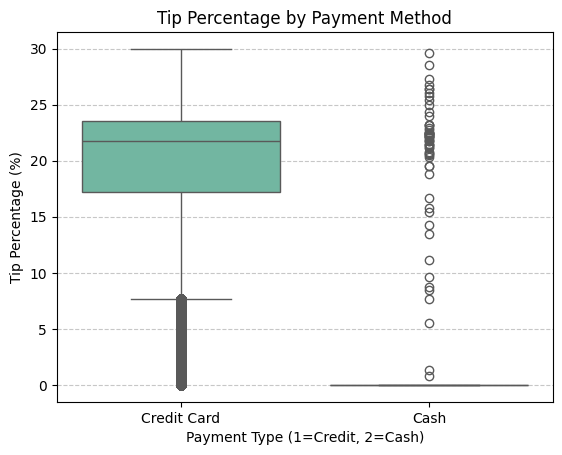

In [19]:
# We also limit the view to under 30% tip to keep the graph readable
plot_data = df_allcleaned[(df_allcleaned['payment_type'].isin([1, 2])) & (df_allcleaned['tip_pct'] < 30) & (df_allcleaned['tip_pct'] >= 0)]

sns.boxplot(x='payment_type', y='tip_pct', data=plot_data, palette="Set2")

plt.title('Tip Percentage by Payment Method')
plt.xlabel('Payment Type (1=Credit, 2=Cash)')
plt.ylabel('Tip Percentage (%)')
plt.xticks([0, 1], ['Credit Card', 'Cash']) # Rename labels for clarity

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Interpretation of  the Result
Credit Card (1): You see a box centered around 20–25%. This is the standard NYC tipping etiquette.

Cash (2): You  see a flat line at 0%.

Insight: This does not mean cash users are rude. It means the system does not record cash tips. The driver pockets the cash, and the machine records $0.

In [19]:
###  # --- IGNORE ---

# Time base analysis

### "Peak Demand Identification: During which specific hour of the day is the volume of taxi trips highest? Does this peak represent a 'Rush Hour' opportunity where fleet utilization should be maximized?"

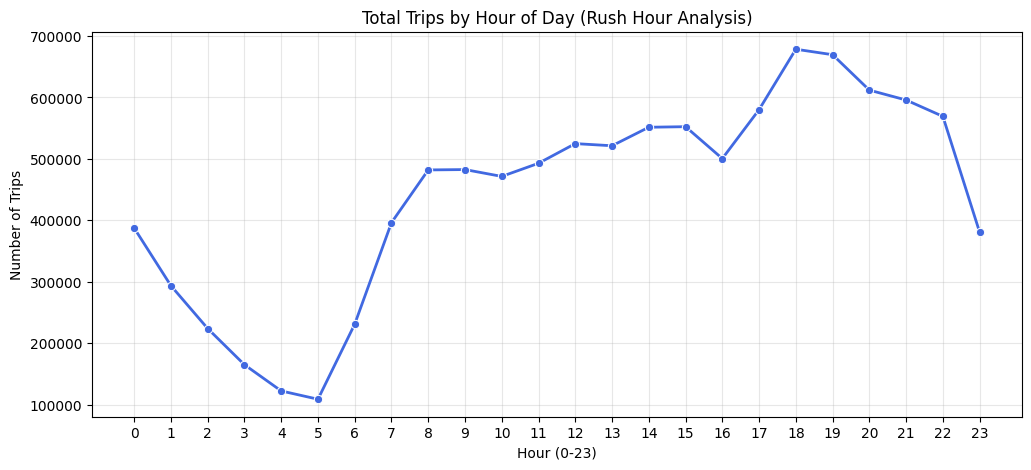

In [17]:
# Group by hour and count trips
hourly_counts = df_allcleaned.groupby('hour').size()

plt.figure(figsize=(12, 5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='royalblue', linewidth=2)

plt.title('Total Trips by Hour of Day (Rush Hour Analysis)')
plt.xlabel('Hour (0-23)')
plt.ylabel('Number of Trips')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24)) # Show every hour explicitly

plt.show()

The Dip: Lowest demand around 3 AM - 5 AM.

The Commute: A sharp rise at 7 AM - 9 AM.

The Peak: The highest demand usually occurs at 6 PM - 7 PM (people leaving work + going to dinner).

# Weekly Trends (Work vs. Party)
### "Peak Demand Identification: On which specific day of the week does the highest volume of taxi trips occur, and what is the percentage drop-off on the least busy day? (This informs when to mandate maximum fleet availability).

### "Weekday vs. Weekend Economy: What is the ratio of trips occurring on Weekdays (Mon-Fri) versus Weekends (Sat-Sun)? Does the city 'sleep' on Sundays?"

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13532\2494450181.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='day_name', data=df_allcleaned, order=day_order, palette='viridis')


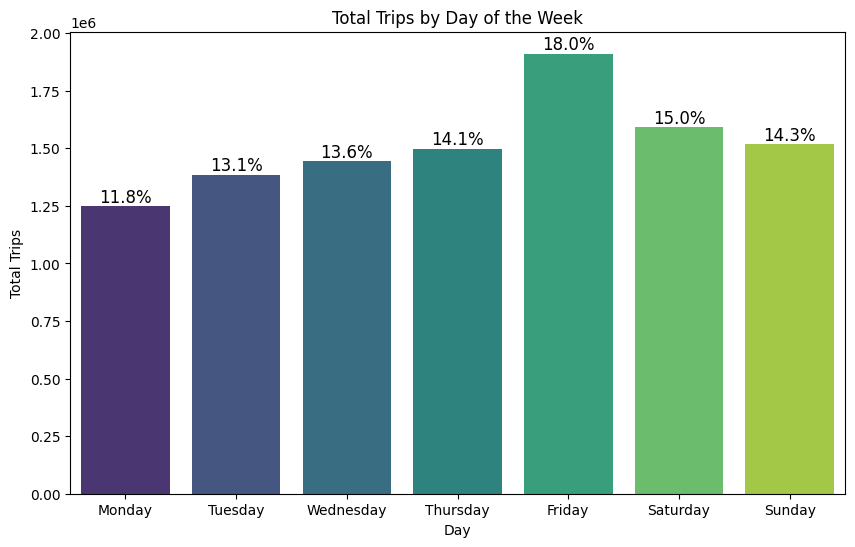

In [21]:
#  Order the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))

#  Create the plot and save it to a variable 'ax'
ax = sns.countplot(x='day_name', data=df_allcleaned, order=day_order, palette='viridis')

plt.title('Total Trips by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Trips')

#  Calculate the total number of trips for percentage
total = len(df_allcleaned)

#  Loop through every bar to add the percentage
for p in ax.patches:
    # Calculate percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    
    # Get the X and Y coordinates of the bar
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    # Annotate the percentage on top
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, color='black')

plt.show()

NYC taxis are usually busiest on Fridays and Saturdays. 

The "City That Never Sleeps" Check: If Sunday's volume is > 80% of Monday's volume, the city effectively does not sleep. In many cities, Sunday drops to 40-50%, but in NYC, it often stays surprisingly high.

# The "Pivot Table" Heatmap (The Ultimate View)
### Business Question: "What specific time block in the entire week is the busiest?"  It allows you to see things like "Friday Night" vs "Monday Morning".

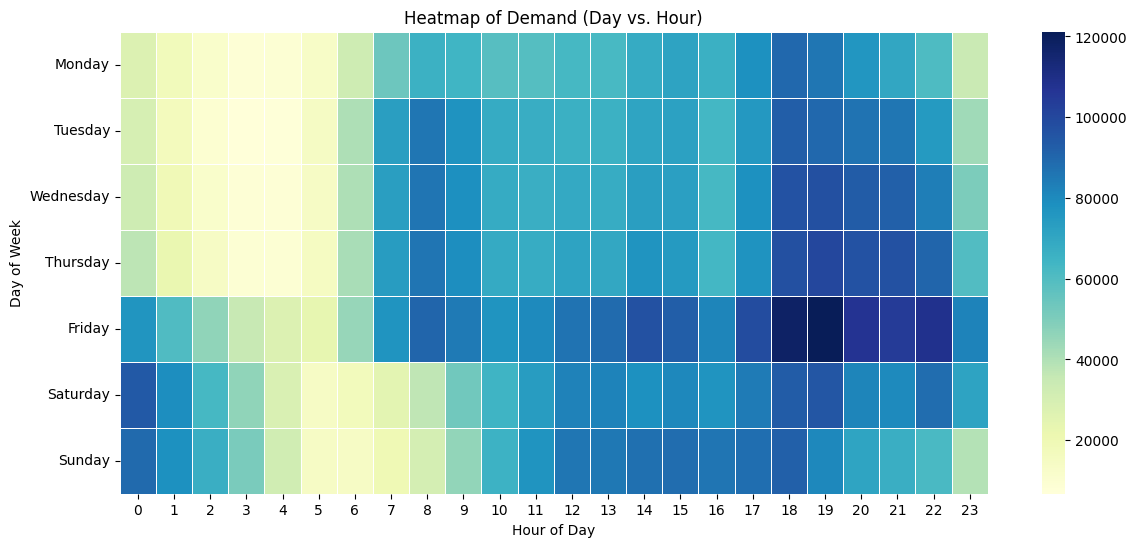

In [23]:
# Group by Day AND  pickup Hour
heatmap_data = df_allcleaned.groupby(['day_name', 'hour']).size().reset_index(name='trips')

#  Pivot the data: Rows = Days, Columns = Hours, Values = Trip Counts
heatmap_pivot = heatmap_data.pivot(index='day_name', columns='hour', values='trips')

#  Sort the rows manually so Monday is at the top
heatmap_pivot = heatmap_pivot.reindex(day_order)

#  Draw the Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_pivot, cmap='YlGnBu', linewidths=0.5)

plt.title('Heatmap of Demand (Day vs. Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

Dark Blue areas are your "Gold Mines" (highest demand). see a dark patch on Friday/Saturday nights (6 PM - 1 AM), which doesn't exist on Mondays.

# "Turnover Maximization: At what hour of the day is the average trip duration the shortest? (identifying the window where drivers can complete the maximum number of rides per hour to boost tip frequency)."

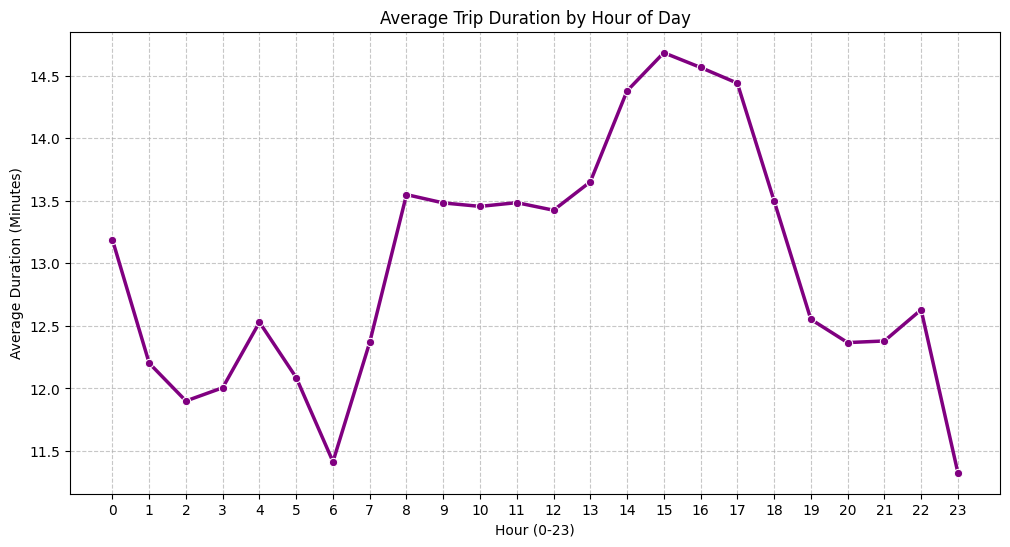

In [17]:
hourly_duration = df_allcleaned.groupby('hour')['trip_duration_min'].mean()

# 4. Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_duration.index, y=hourly_duration.values, marker='o', color='purple', linewidth=2.5)

plt.title('Average Trip Duration by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Average Duration (Minutes)')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

This chart is working correctly and reveals the "Traffic Rhythm" of the city.

>Most Efficient Time (6:00 AM): 
The dip to ~11.5 minutes indicates the roads are clearest. Drivers can complete trips faster, leading to higher turnover potential.

>Least Efficient Time (3:00 PM - 4:00 PM): 
The peak at ~14.5 minutes is the "Afternoon Slump." This coincides with school dismissals and the early rush hour. Trips take ~25% longer to complete during this window than in the early morning.

>The "Late Night" Drop:
The sharp drop after 10 PM confirms that night shifts offer faster rides, though likely with lower demand.

# Number of trips per hour

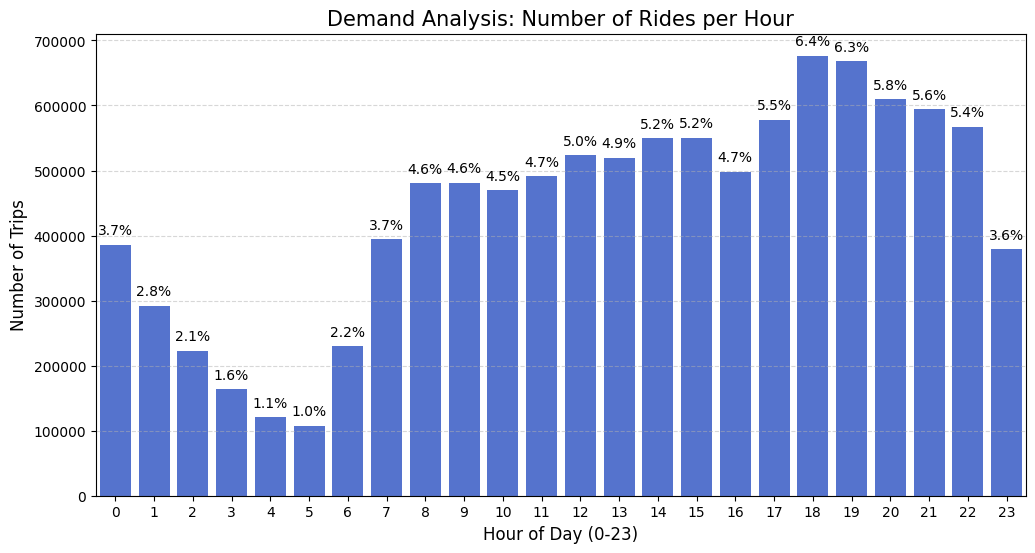

In [20]:
plt.figure(figsize=(12, 6))


ax = sns.countplot(x='hour', data=df_allcleaned, color='royalblue')

plt.title('Demand Analysis: Number of Rides per Hour', fontsize=15)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 3. Calculate and Add Percentages
total_trips = len(df_allcleaned)

for p in ax.patches:
    # Calculate the percentage for this specific bar
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_trips)
    
    # Get X and Y coordinates to place the text
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    # Write the percentage on top of the bar
    ax.annotate(percentage, (x, y), 
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.show()

This graph answers the "Volume" question: When are the customers actually there?

>The "Golden Window" (6 PM - 7 PM):

Observation: The two tallest bars are at 18:00 (6.4%) and 19:00 (6.3%).

Business Insight: This is the absolute peak of the day. The fleet must be at 100% capacity during these two hours. This is the "Dinner & Commute" overlap.

>The "Dead Zone" (4 AM - 5 AM):

Observation: Demand hits rock bottom at 4:00 (1.1%) and 5:00 (1.0%).

Business Insight: Only ~1% of daily rides happen here. This is the ideal time for fleet maintenance, refueling, or driver shift changes.

>The "Late Night" Surprise:

Observation: Midnight (0:00) still has 3.7% of rides—higher than 7 AM or 10 AM!

Business Insight: NYC "nightlife" demand is significant. A night-shift driver can make steady money without the traffic of the day.

>The "3 PM Trap" (The Mismatch):

Demand : At 3 PM (15:00), demand is moderate (5.2%).

Duration : At 3 PM, trip duration is at its highest peak (~14.5 mins).

The Insight: 3 PM is the least profitable hour for drivers. They are stuck in the worst traffic (school buses/commercial deliveries) but demand isn't at its peak yet. They work harder for less turnover.

>The "6 PM Sweet Spot":

Demand: Peak (6.4%).

Duration: Duration actually drops slightly after 4 PM.

The Insight: By 6 PM, traffic clears slightly (or moves differently), allowing drivers to pick up the maximum number of passengers efficiently.

# Vendor analysis

### Vendor Market Share:  which vendor captures the larger share of the total rides?
### "Vendor Revenue Dominance: Which vendor (VendorID) captures the largest share of the total financial market?

   VendorID  Total_Trips  Total_Revenue   Avg_Fare          Vendor_Name
0         1      4869317    74425448.58  15.284577  Creative Mobile (1)
1         2      5687746    88585913.16  15.574872         VeriFone (2)


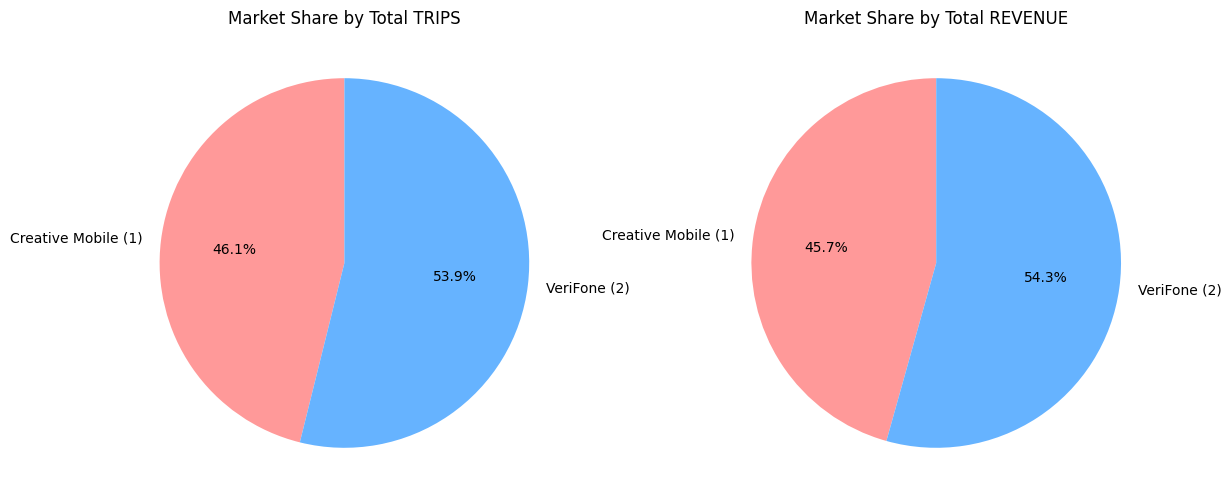

In [ ]:
# Calculate Total Trips and Total Revenue per Vendor
vendor_stats = df_allcleaned.groupby('VendorID').agg(
    Total_Trips=('total_amount', 'count'),
    Total_Revenue=('total_amount', 'sum'),
    Avg_Fare=('total_amount', 'mean')
).reset_index()

# Map IDs to Names for better labels
vendor_map = {1: 'Creative Mobile (1)', 2: 'VeriFone (2)'}
vendor_stats['Vendor_Name'] = vendor_stats['VendorID'].map(vendor_map)

print(vendor_stats)

#  Visualize Market Share (Pie Charts)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Trips Pie Chart
ax[0].pie(vendor_stats['Total_Trips'], labels=vendor_stats['Vendor_Name'], 
          autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
ax[0].set_title('Market Share by Total TRIPS')

# Revenue Pie Chart
ax[1].pie(vendor_stats['Total_Revenue'], labels=vendor_stats['Vendor_Name'], 
          autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
ax[1].set_title('Market Share by Total REVENUE')

plt.show()

# Revenue share by hour

### "The 'Money Hour' Identification: Which specific hour of the day captures the highest percentage of the total market revenue? If a driver misses the 7 PM - 9 PM window, what percentage of the potential daily market are they sacrificing?"

### (Comparative Analysis):

### "Nightlife vs. Commute Economy: How does the revenue share generated during the 'Morning Rush' (7 AM - 10 AM) compare to the 'Late Night' economy (10 PM - 1 AM)? Is the taxi business primarily driven by workers or socializers?"

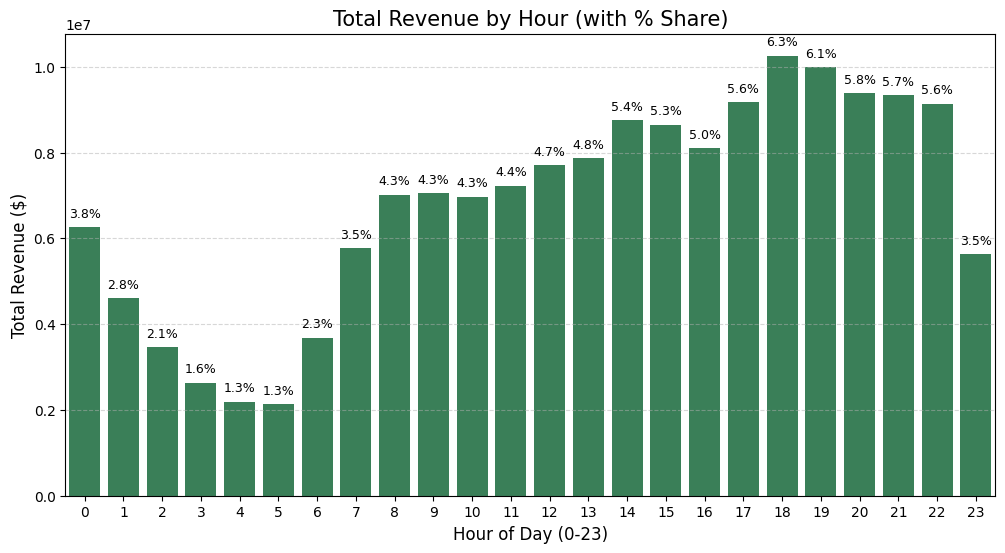

In [ ]:
hourly_revenue = df_allcleaned.groupby('hour')['total_amount'].sum()

#  Calculate the Grand Total for Percentages
total_revenue_all = hourly_revenue.sum()

#  Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=hourly_revenue.index, y=hourly_revenue.values, color='seagreen')

plt.title('Total Revenue by Hour (with % Share)', fontsize=15)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

#  Add Labels (Percentage)
for p in ax.patches:
    # Get the height (Revenue Amount)
    height = p.get_height()
    
    # Calculate Percentage
    percentage = (height / total_revenue_all) * 100
    
  # Create label with ONLY the percentage
    label = f"{percentage:.1f}%"
    
    # Place text on top of the bar
    ax.annotate(label, 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', 
                fontsize=9, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

plt.show()

>The "Golden Window" (6 PM - 7 PM):

Observation: The peak revenue occurs at 18:00 (6.3%) and 19:00 (6.1%).

Insight: This is the most lucrative time of day. The combination of high demand (commuters + social outings) and traffic surcharges likely drives this peak.

>Morning Rush is Weaker than Evening Rush:

Observation: The morning peak at 8:00 AM is only 4.3%, significantly lower than the evening peak (>6%).

Insight: The morning commute is concentrated and likely shorter (just getting to work), whereas the evening rush spreads out into longer, more expensive social/dinner trips.

Rush Hour Discrepancy: Compare 8 AM (Morning Rush) to 6 PM (Evening Rush). Even though traffic is bad in both, 6 PM usually makes significantly more money because of leisure trips + airport runs that happen after work.

>The "Dead Zone" (4 AM - 5 AM):

Observation: Revenue hits its absolute floor at 1.3%.

Insight: Unless targeting specific airport runs, this is the least productive time for a driver to be on the road.

>Mid-Day Stability:

Observation: From 11 AM to 4 PM, revenue is remarkably stable (hovering between 4.4% and 5.4%).

Insight: There is consistent business during business hours, likely from business meetings, deliveries, and tourists.

# "The Revenue Peak Analysis: Which specific day of the week generates the highest total gross revenue? Does the increased volume on Fridays translate to the highest financial return, or do Saturday's longer leisure trips generate more actual income?"

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12840\2200795025.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette='viridis')


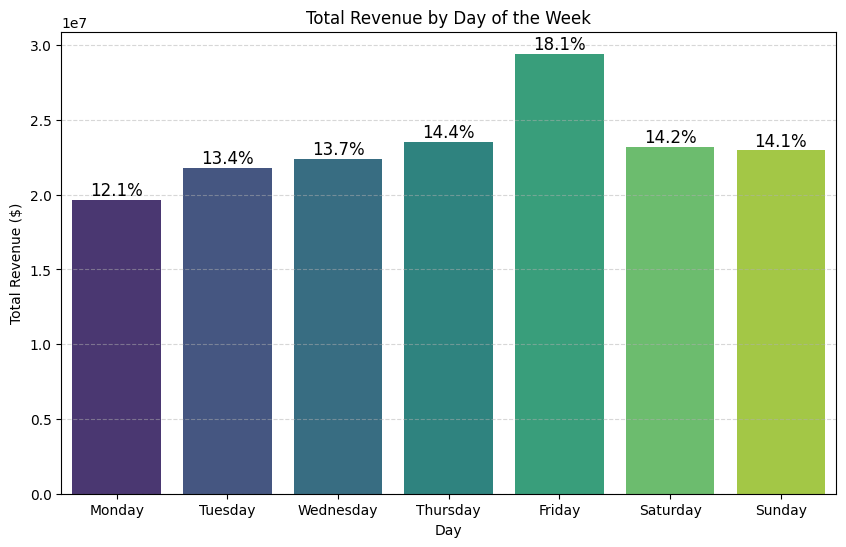

In [24]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day = df_allcleaned.groupby('day_name')['total_amount'].sum().reindex(day_order)

# 4. Plot
plt.figure(figsize=(10, 6))
# We use a bar plot for totals
ax = sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette='viridis')

plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 5. Add Percentages on top
total_revenue = revenue_by_day.sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_revenue)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()

Thursday & Friday: Usually the highest revenue days (business travel + start of weekend nightlife).

Monday: Typically the lowest revenue day.

# Ratecode Analysis

### "The JFK vs. Newark Split: What is the revenue contribution of fixed-rate Airport trips (Rate Code 2 for JFK, Rate Code 3 for Newark) compared to standard city driving? Are airport runs statistically more valuable per trip than standard metered rides?"

--- Rate Code Statistics ---
     Rate Name  Trip Count  Avg Fare ($)  Avg Distance
5     Standard    10319077     14.261105      4.390881
1          JFK      209585     64.572111     17.906336
4       Newark       15555     90.038014     17.125567
3   Negotiated       11017     76.512267      8.975854
2  Nassau/West        1550     43.674110     10.251310
0        Group          35      8.154857      2.239429


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12840\1211882649.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rate Name', y='Trip Count', data=rate_stats, ax=ax[0], palette='viridis')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_12840\1211882649.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rate Name', y='Avg Fare ($)', data=rate_stats_fare, ax=ax[1], palette='magma')


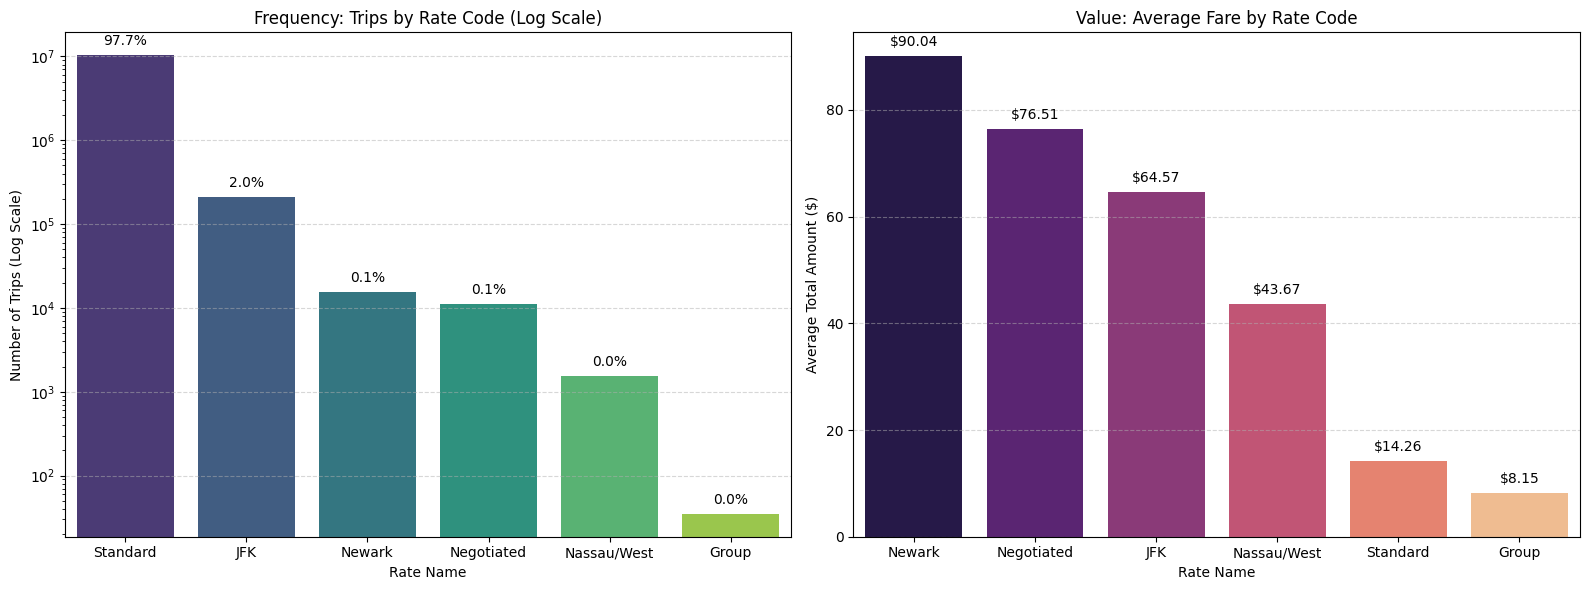

In [27]:
#Map RatecodeID to meaningful names
rate_code_map = {
    1: 'Standard',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau/West',
    5: 'Negotiated',
    6: 'Group'
}

# Apply the mapping
df_allcleaned['rate_code_name'] = df_allcleaned['RatecodeID'].map(rate_code_map)

# 2. Calculate Statistics (Frequency & Value)
rate_stats = df_allcleaned.groupby('rate_code_name').agg({
    'total_amount': ['count', 'mean'],  # Count for Frequency, Mean for Value
    'trip_distance': 'mean'             # Mean distance for context
}).reset_index()

# Flatten the multi-level column names
rate_stats.columns = ['Rate Name', 'Trip Count', 'Avg Fare ($)', 'Avg Distance']

# Sort by Count to see the most common ones first
rate_stats = rate_stats.sort_values(by='Trip Count', ascending=False)

print("--- Rate Code Statistics ---")
print(rate_stats)

#  Visualization: Two Charts side-by-side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# --- Chart 1: Frequency (Number of Trips) ---
sns.barplot(x='Rate Name', y='Trip Count', data=rate_stats, ax=ax[0], palette='viridis')
ax[0].set_yscale('log') 
ax[0].set_title('Frequency: Trips by Rate Code (Log Scale)')
ax[0].set_ylabel('Number of Trips (Log Scale)')
ax[0].grid(axis='y', linestyle='--', alpha=0.5)

# Calculate Total Trips for Percentage
total_trips = rate_stats['Trip Count'].sum()

# Add counts AND percentages on top of bars
for p in ax[0].patches:
    height = p.get_height()
    percentage = (height / total_trips) * 100
    
    # Text: "Count (Percentage%)"
    label_text = f'{percentage:.1f}%'
    
    ax[0].annotate(label_text, 
                   (p.get_x() + p.get_width() / 2., height), 
                   ha = 'center', va = 'bottom', xytext = (0, 5), 
                   textcoords = 'offset points', fontsize=10)

# --- Chart 2: Value (Average Fare) ---
rate_stats_fare = rate_stats.sort_values(by='Avg Fare ($)', ascending=False)
sns.barplot(x='Rate Name', y='Avg Fare ($)', data=rate_stats_fare, ax=ax[1], palette='magma')
ax[1].set_title('Value: Average Fare by Rate Code')
ax[1].set_ylabel('Average Total Amount ($)')
ax[1].grid(axis='y', linestyle='--', alpha=0.5)

# Add prices on top of bars
for p in ax[1].patches:
    ax[1].annotate(f'${p.get_height():.2f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'bottom', xytext = (0, 5), 
                   textcoords = 'offset points')

plt.tight_layout()
plt.show()


# Based on the "Rate Code" charts (Frequency vs. Average Fare), here is the concise analysis:

>Volume vs. Value Trade-off:

Volume King: "Standard" city trips account for 97.7% of all rides. This is the bread and butter of the fleet.

Value King: "Newark" trips are the most expensive (avg $90.04), followed by "Negotiated" ($76.51) and "JFK" ($64.57).

>The "Airport Strategy":

While "JFK" trips make up only 2.0% of total rides, they offer 4.5x the revenue of a Standard trip ($64 vs. $14).

Newark is the highest value prize ($90+), but it is extremely rare (0.1%).

>Visual Note:

The left chart uses a Log Scale (powers of 10) to make the small bars visible. In reality, the "Standard" bar is nearly 50 times taller than the "JFK" bar.

Business Insight: A driver relies on "Standard" trips for consistent work, but hunting for "Airport" trips (JFK/Newark) is the key to maximizing daily earnings efficiently.